In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
import warnings
warnings.filterwarnings('ignore')


In [91]:
data = pd.read_csv('trials.csv')

In [92]:
print(data.shape)

(43962, 26)


# Data Exploration

In [93]:
data.head(3)

,Rank,NCT Number,Title,Recruitment,Study Results,Conditions,Interventions,Sponsor/Collaborators,Gender,Age,...,First Received,Start Date,Completion Date,Last Updated,Last Verified,Results First Received,Acronym,Primary Completion Date,Outcome Measures,URL
0,1,NCT01638533,"Romidepsin in Treating Patients With Lymphoma,...",Recruiting,No Results Available,Adult Mixed Glioma|Adult Pineal Gland Astrocyt...,Other: Pharmacological Study|Drug: Romidepsin,National Cancer Institute (NCI)|Celgene Corpor...,Both,"18 Years and older (Adult, Senior)",...,9-Jul-12,Jun-12,NaN,19-Jul-16,Apr-16,No Study Results Posted,NaN,Sep-17,Dose-limiting toxicity of romidepsin in groups...,https://ClinicalTrials.gov/show/NCT01638533
1,2,NCT01460134,A Study of CDX-1127 (Varlilumab) in Patients W...,"Active, not recruiting",No Results Available,"CD27 Expressing B-cell Malignancies, (for Exam...",Drug: CDX-1127|Drug: CDX-1127|Drug: CDX-1127,Celldex Therapeutics,Both,"18 Years and older (Adult, Senior)",...,12-Oct-11,Oct-11,Dec-16,5-Apr-16,Apr-16,No Study Results Posted,NaN,Dec-15,Characterize the adverse events associated wit...,https://ClinicalTrials.gov/show/NCT01460134
2,3,NCT01660776,BMS_PD-L1_onco : Assessment of the PD-L1 Prote...,Recruiting,No Results Available,Diffuse Large B-cell Lymphoma|Hodgkin Lymphoma...,NaN,Rennes University Hospital|Roche Pharma AG|Nat...,Both,"18 Years to 75 Years (Adult, Senior)",...,31-Jul-12,Jun-12,Jun-17,5-Jul-16,Jul-16,No Study Results Posted,BMS_PD-L1,Jun-17,Description of one or several blood cell types...,https://ClinicalTrials.gov/show/NCT01660776


In [94]:
# NCT :national clinical trial No
# since first column denotes an index column and begins from 0 it can be dropped and insted rank column can be used as index.

In [95]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43962 entries, 0 to 43961
Data columns (total 26 columns):
Rank                       43962 non-null int64
NCT Number                 43962 non-null object
Title                      43962 non-null object
Recruitment                43962 non-null object
Study Results              43962 non-null object
Conditions                 43962 non-null object
Interventions              39709 non-null object
Sponsor/Collaborators      43962 non-null object
Gender                     43919 non-null object
Age                        43962 non-null object
Phases                     28460 non-null object
Enrollment                 43543 non-null float64
Funded Bys                 43962 non-null object
Study Types                43962 non-null object
Study Designs              43444 non-null object
Other IDs                  43954 non-null object
First Received             43962 non-null object
Start Date                 43602 non-null object
Completio

In [96]:
data.apply(lambda x:sum(x.isnull()))


Rank                           0
NCT Number                     0
Title                          0
Recruitment                    0
Study Results                  0
Conditions                     0
Interventions               4253
Sponsor/Collaborators          0
Gender                        43
Age                            0
Phases                     15502
Enrollment                   419
Funded Bys                     0
Study Types                    0
Study Designs                518
Other IDs                      8
First Received                 0
Start Date                   360
Completion Date             7097
Last Updated                   0
Last Verified                  0
Results First Received         0
Acronym                    33579
Primary Completion Date     1378
Outcome Measures            1101
URL                            0
dtype: int64

In [97]:
data.describe()

,Rank,Enrollment
count,43962.000000,4.354300e+04
mean,21981.500000,8.869827e+03
std,12690.880604,8.382326e+05
min,1.000000,0.000000e+00
25%,10991.250000,2.700000e+01
50%,21981.500000,6.000000e+01
75%,32971.750000,1.620000e+02
max,43962.000000,1.000000e+08


In [98]:
data.apply(lambda x: len(x.unique()))

Rank                       43962
NCT Number                 43962
Title                      43894
Recruitment                   12
Study Results                  2
Conditions                 18567
Interventions              34003
Sponsor/Collaborators      15139
Gender                         4
Age                         1252
Phases                         8
Enrollment                  1837
Funded Bys                    36
Study Types                    3
Study Designs               1414
Other IDs                  43713
First Received              3265
Start Date                   338
Completion Date              431
Last Updated                2785
Last Verified                157
Results First Received      1463
Acronym                     9439
Primary Completion Date      430
Outcome Measures           41531
URL                        43962
dtype: int64

In [99]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x in ['Recruitment',"Study Results",'Gender','Phases',
                                                              "Study Types"]]
for col in categorical_columns:
    print('\nFrequency of categories for variable %s'%col)
    print(data[col].value_counts(dropna=False))


Frequency of categories for variable Recruitment
Recruiting                   14915
Completed                    14504
Active, not recruiting        6439
Terminated                    3225
Not yet recruiting            2654
Withdrawn                     1180
Enrolling by invitation        579
Suspended                      314
Available                       71
No longer available             55
Approved for marketing          20
Temporarily not available        6
Name: Recruitment, dtype: int64

Frequency of categories for variable Study Results
No Results Available    40069
Has Results              3893
Name: Study Results, dtype: int64

Frequency of categories for variable Gender
Both      34809
Female     6567
Male       2543
NaN          43
Name: Gender, dtype: int64

Frequency of categories for variable Phases
NaN                15502
Phase 2            11633
Phase 1             6632
Phase 3             4110
Phase 1|Phase 2     3183
Phase 4             1708
Phase 2|Phase 3      

In [100]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


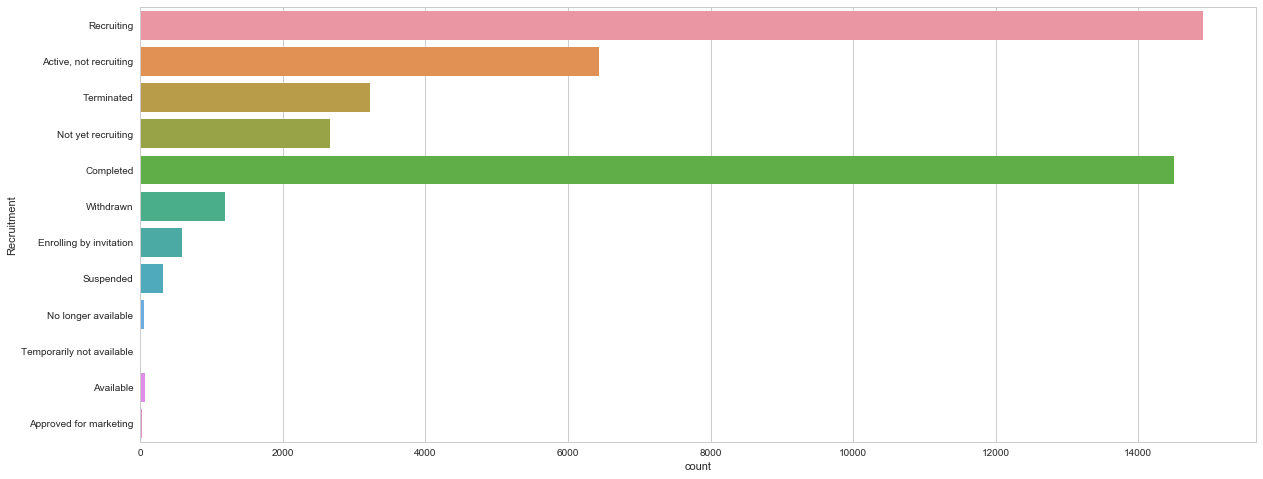

In [101]:
plt.figure(figsize=(20,8))
sns.countplot(y='Recruitment',data=data)





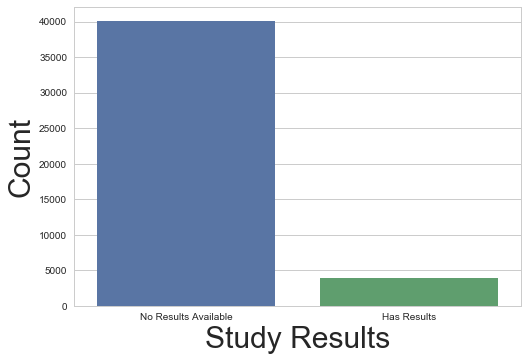

In [102]:
#plt.figure(figsize=(10,6))
sns.countplot(x="Study Results",data=data)
plt.xlabel('Study Results',size=30)
plt.ylabel('Count',size=30)

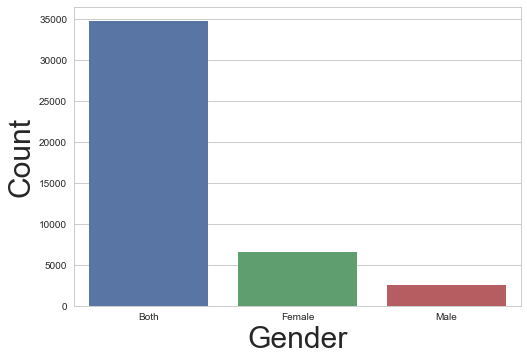

In [103]:
sns.countplot(x="Gender",data=data)
plt.xlabel('Gender',size=30)
plt.ylabel('Count',size=30)

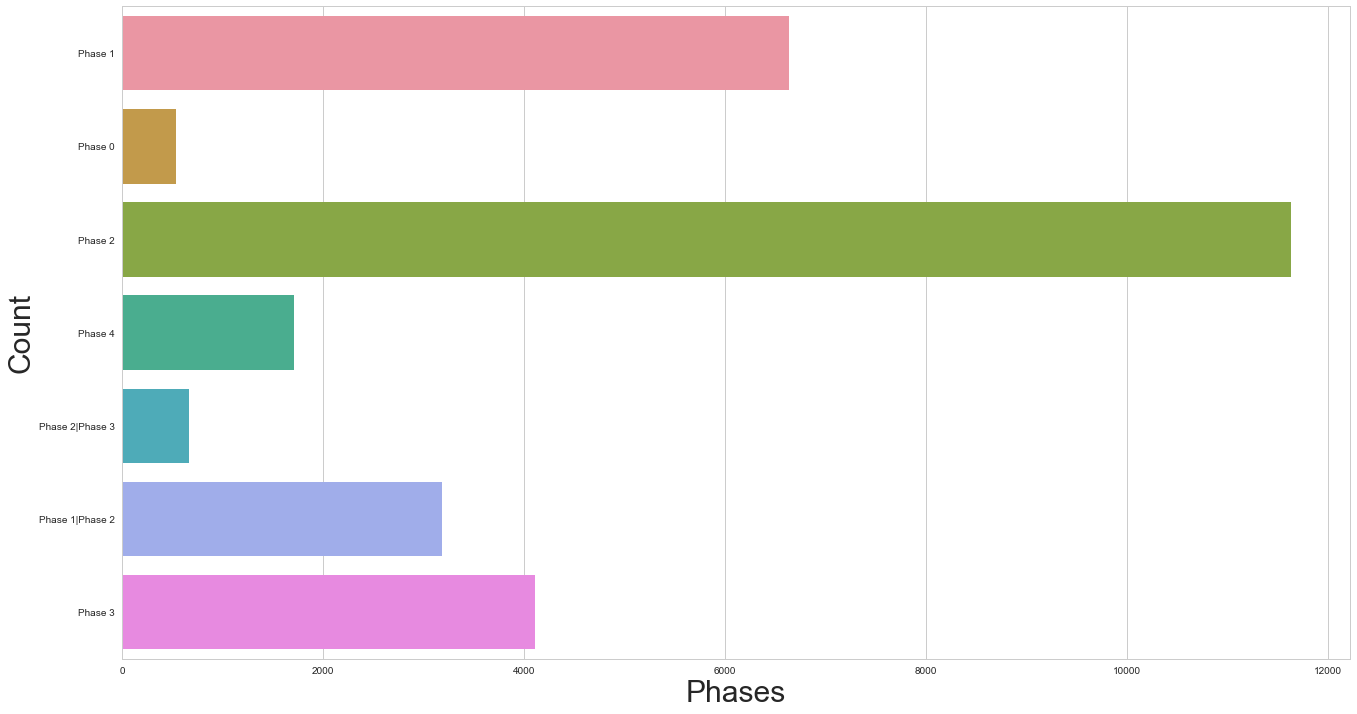

In [104]:
plt.figure(figsize=(22,12))
sns.countplot(y="Phases",data=data)
plt.xlabel('Phases',size=30)
plt.ylabel('Count',size=30)




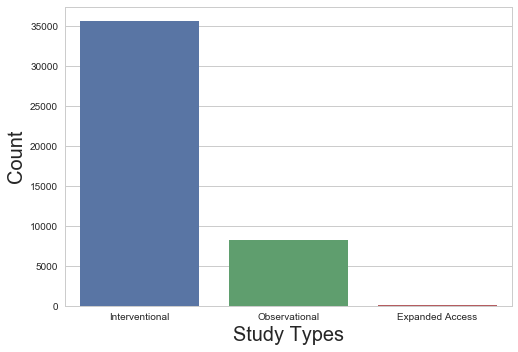

In [105]:

sns.countplot(x="Study Types",data=data)
plt.xlabel('Study Types',size=20)
plt.ylabel('Count',size=20)

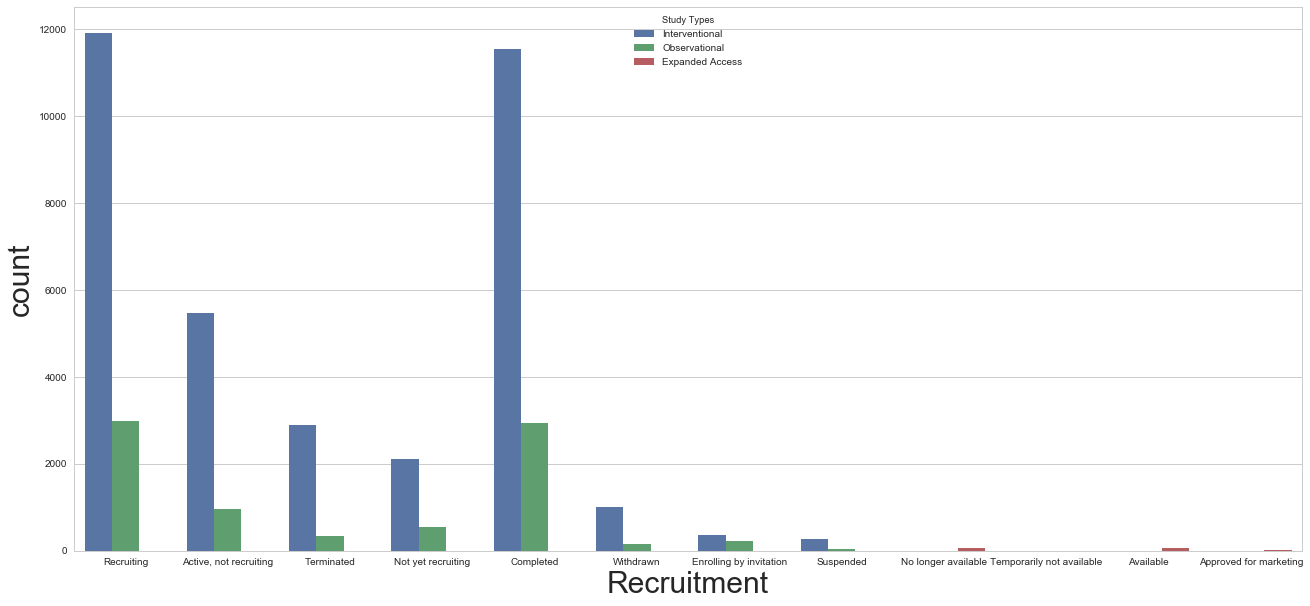

In [106]:
plt.figure(figsize=(22,10))
plt.xlabel('Recruitment',size=30)
plt.ylabel('Count',size=30)
sns.countplot(hue="Study Types",x ='Recruitment',data=data)

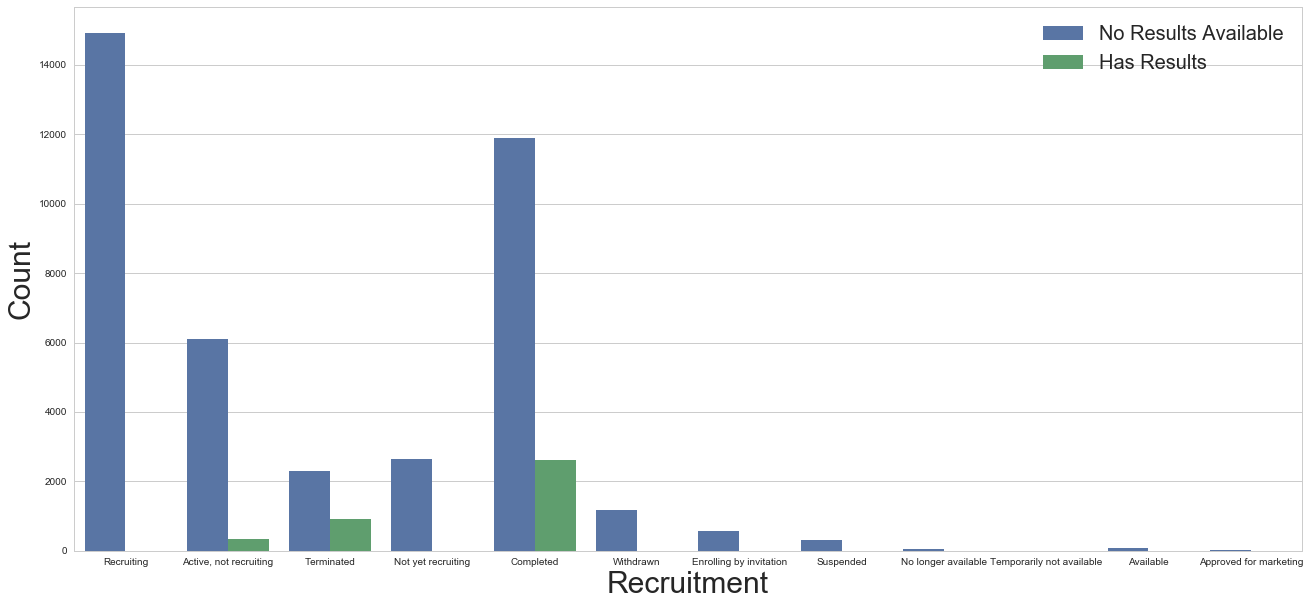

In [107]:
plt.figure(figsize=(22,10))
sns.countplot(hue="Study Results",x ='Recruitment',data=data)
plt.xlabel('Recruitment',size=30)
plt.ylabel('Count',size=30)
plt.legend(prop={'size':20},loc=1)

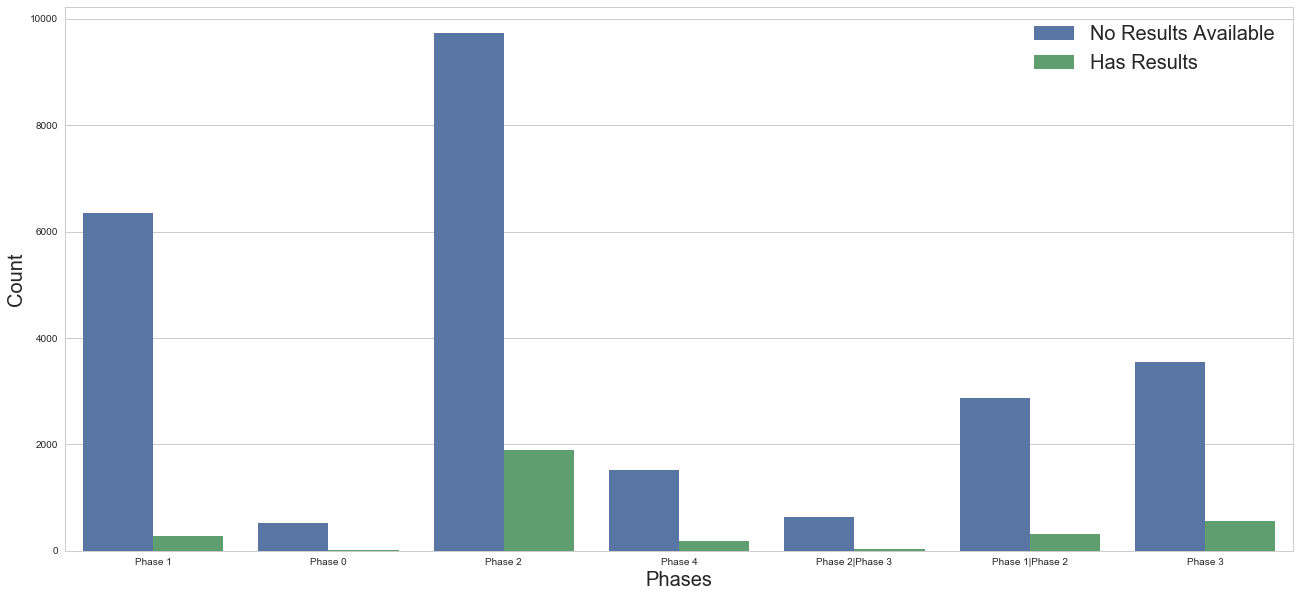

In [108]:
plt.figure(figsize=(22,10))
sns.countplot(hue="Study Results",x ='Phases',data=data)
plt.xlabel('Phases',size=20)
plt.ylabel('Count',size=20)
plt.legend(prop={'size':20},loc=1)

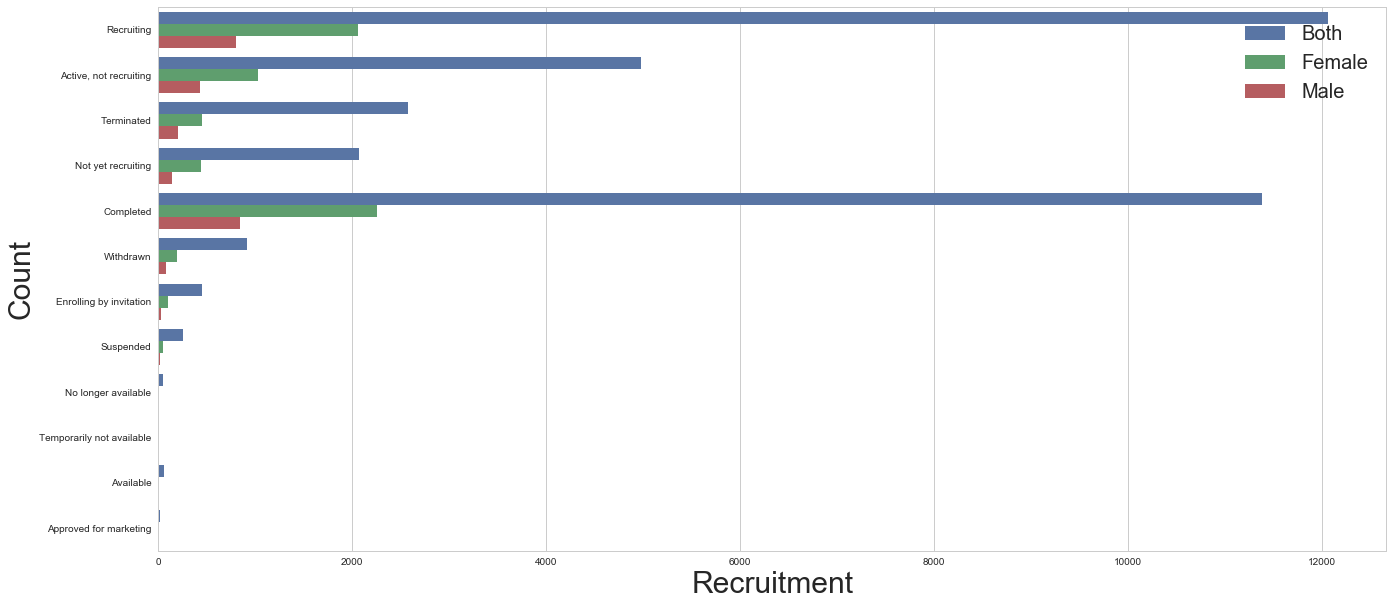

In [109]:
plt.figure(figsize=(22,10))
sns.countplot(hue="Gender",y ='Recruitment',data=data)
plt.xlabel('Recruitment',size=30)
plt.ylabel('Count',size=30)
plt.legend(prop={'size':20},loc=1)

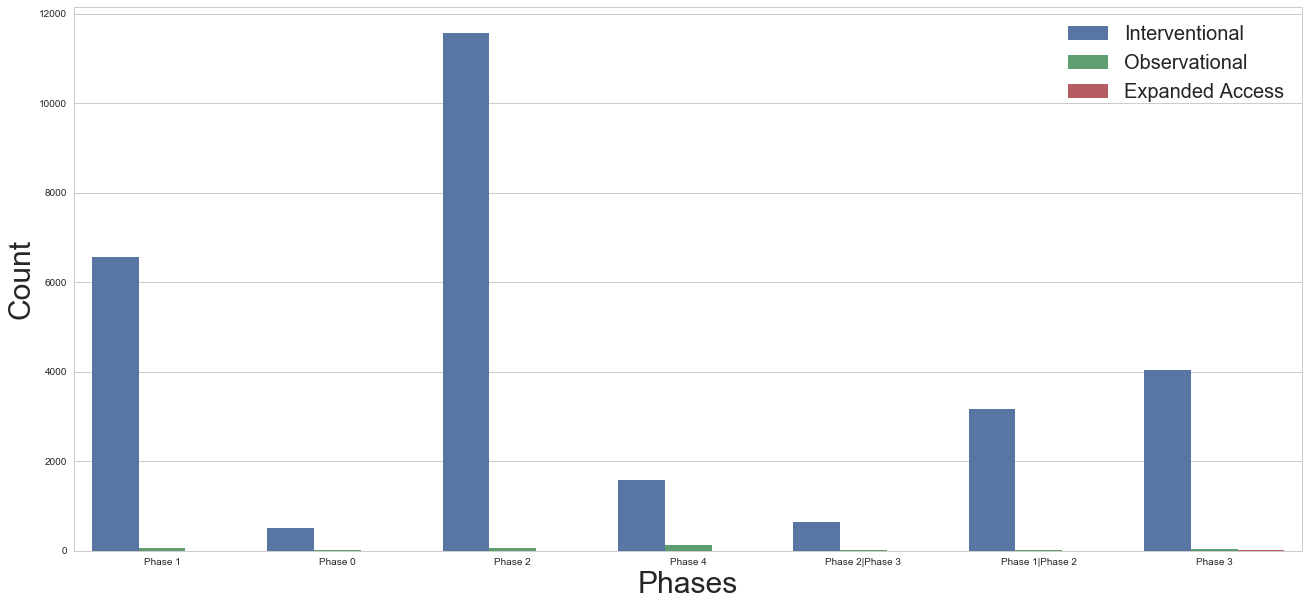

In [110]:
plt.figure(figsize=(22,10))
sns.countplot(hue="Study Types",x ='Phases',data=data)
plt.xlabel('Phases',size=30)
plt.ylabel('Count',size=30)
plt.legend(prop={'size':20},loc=1)

# Feature Engineering

In [111]:
# Funded by can be combined
# total time taken for study can be calculated..completion date-start date(for completed studies)
# for studies with null completion time check if they are still recruiting or not
# Results first received can be categorised Year Wise

In [112]:
data['Start Date'].head()

0    Jun-12
1    Oct-11
2    Jun-12
3    Mar-07
4    Mar-10
Name: Start Date, dtype: object